In [29]:
#importing important libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
#importing dataset
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
#size of dataset
df.shape

(8425, 23)

In [7]:
#summary of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [9]:
#finding the count of missing values in different columns
df.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [10]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [16]:
#filling null values
df["MinTemp"]=df["MinTemp"].fillna(df["MinTemp"].mean())
df["MaxTemp"]=df["MaxTemp"].fillna(df["MaxTemp"].mean())
df["Rainfall"]=df["Rainfall"].fillna(df["Rainfall"].mean())
df["Evaporation"]=df["Evaporation"].fillna(df["Evaporation"].mean())
df["Sunshine"]=df["Sunshine"].fillna(df["Sunshine"].mean())
df["WindGustSpeed"]=df["WindGustSpeed"].fillna(df["WindGustSpeed"].mean())
df["WindSpeed9am"]=df["WindSpeed9am"].fillna(df["WindSpeed9am"].mean())
df["WindSpeed3pm"]=df["WindSpeed3pm"].fillna(df["WindSpeed3pm"].mean())
df["Humidity9am"]=df["Humidity9am"].fillna(df["Humidity9am"].mean())
df["Humidity3pm"]=df["Humidity3pm"].fillna(df["Humidity3pm"].mean())
df["Pressure9am"]=df["Pressure9am"].fillna(df["Pressure9am"].mean())
df["Pressure3pm"]=df["Pressure3pm"].fillna(df["Pressure3pm"].mean())
df["Cloud9am"]=df["Cloud9am"].fillna(df["Cloud9am"].mean())
df["Cloud3pm"]=df["Cloud3pm"].fillna(df["Cloud3pm"].mean())
df["Temp9am"]=df["Temp9am"].fillna(df["Temp9am"].mean())
df["Temp3pm"]=df["Temp3pm"].fillna(df["Temp3pm"].mean())

In [17]:
df.isna().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir      991
WindGustSpeed      0
WindDir9am       829
WindDir3pm       308
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        240
RainTomorrow     239
dtype: int64

In [34]:
df=df.drop(columns=["WindGustDir"])
df=df.drop(columns=["WindDir9am"])
df=df.drop(columns=["WindDir3pm"])
df=df.drop(columns=["Date"])
df=df.drop(columns=["Location"])
df

KeyError: "['WindGustDir'] not found in axis"

In [25]:
df['RainToday']=df['RainToday'].replace({'Yes':1,'No':0})
df['RainTomorrow']=df['RainTomorrow'].replace({'Yes':1,'No':0})
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,5.389395,7.632205,44.000000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.100000,0.0,5.389395,7.632205,44.000000,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.700000,0.0,5.389395,7.632205,46.000000,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.000000,0.0,5.389395,7.632205,24.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.300000,1.0,5.389395,7.632205,41.000000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.400000,0.0,5.389395,7.632205,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0.0,0.0
8421,2017-06-22,Uluru,3.6,25.300000,0.0,5.389395,7.632205,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0.0,0.0
8422,2017-06-23,Uluru,5.4,26.900000,0.0,5.389395,7.632205,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0.0,0.0
8423,2017-06-24,Uluru,7.8,27.000000,0.0,5.389395,7.632205,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0.0,0.0


In [26]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8185.000000,8186.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,0.243128,0.243220
std,5.379488,6.114516,10.309308,3.852004,2.825451,13.776101,10.128579,9.704759,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849,0.428998,0.429053
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000
25%,9.300000,19.300000,0.000000,4.000000,7.632205,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,0.000000,0.000000
50%,13.200000,23.300000,0.000000,5.389395,7.632205,40.174469,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000,0.000000,0.000000
75%,17.300000,28.000000,1.400000,5.389395,8.900000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,0.000000,0.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,1.000000,1.000000


In [27]:
#filling null values
df["RainToday"]=df["RainToday"].fillna(df["RainToday"].mean())
df["RainTomorrow"]=df["RainTomorrow"].fillna(df["RainTomorrow"].mean())
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,5.389395,7.632205,44.000000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0.0,0.00000
1,2008-12-02,Albury,7.4,25.100000,0.0,5.389395,7.632205,44.000000,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0.0,0.00000
2,2008-12-03,Albury,12.9,25.700000,0.0,5.389395,7.632205,46.000000,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0.0,0.00000
3,2008-12-04,Albury,9.2,28.000000,0.0,5.389395,7.632205,24.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0.0,0.00000
4,2008-12-05,Albury,17.5,32.300000,1.0,5.389395,7.632205,41.000000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.400000,0.0,5.389395,7.632205,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0.0,0.00000
8421,2017-06-22,Uluru,3.6,25.300000,0.0,5.389395,7.632205,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0.0,0.00000
8422,2017-06-23,Uluru,5.4,26.900000,0.0,5.389395,7.632205,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0.0,0.00000
8423,2017-06-24,Uluru,7.8,27.000000,0.0,5.389395,7.632205,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0.0,0.00000


In [28]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [35]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.900000,0.6,5.389395,7.632205,44.000000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0.0,0.00000
1,7.4,25.100000,0.0,5.389395,7.632205,44.000000,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0.0,0.00000
2,12.9,25.700000,0.0,5.389395,7.632205,46.000000,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0.0,0.00000
3,9.2,28.000000,0.0,5.389395,7.632205,24.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0.0,0.00000
4,17.5,32.300000,1.0,5.389395,7.632205,41.000000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.400000,0.0,5.389395,7.632205,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0.0,0.00000
8421,3.6,25.300000,0.0,5.389395,7.632205,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0.0,0.00000
8422,5.4,26.900000,0.0,5.389395,7.632205,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0.0,0.00000
8423,7.8,27.000000,0.0,5.389395,7.632205,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0.0,0.00000


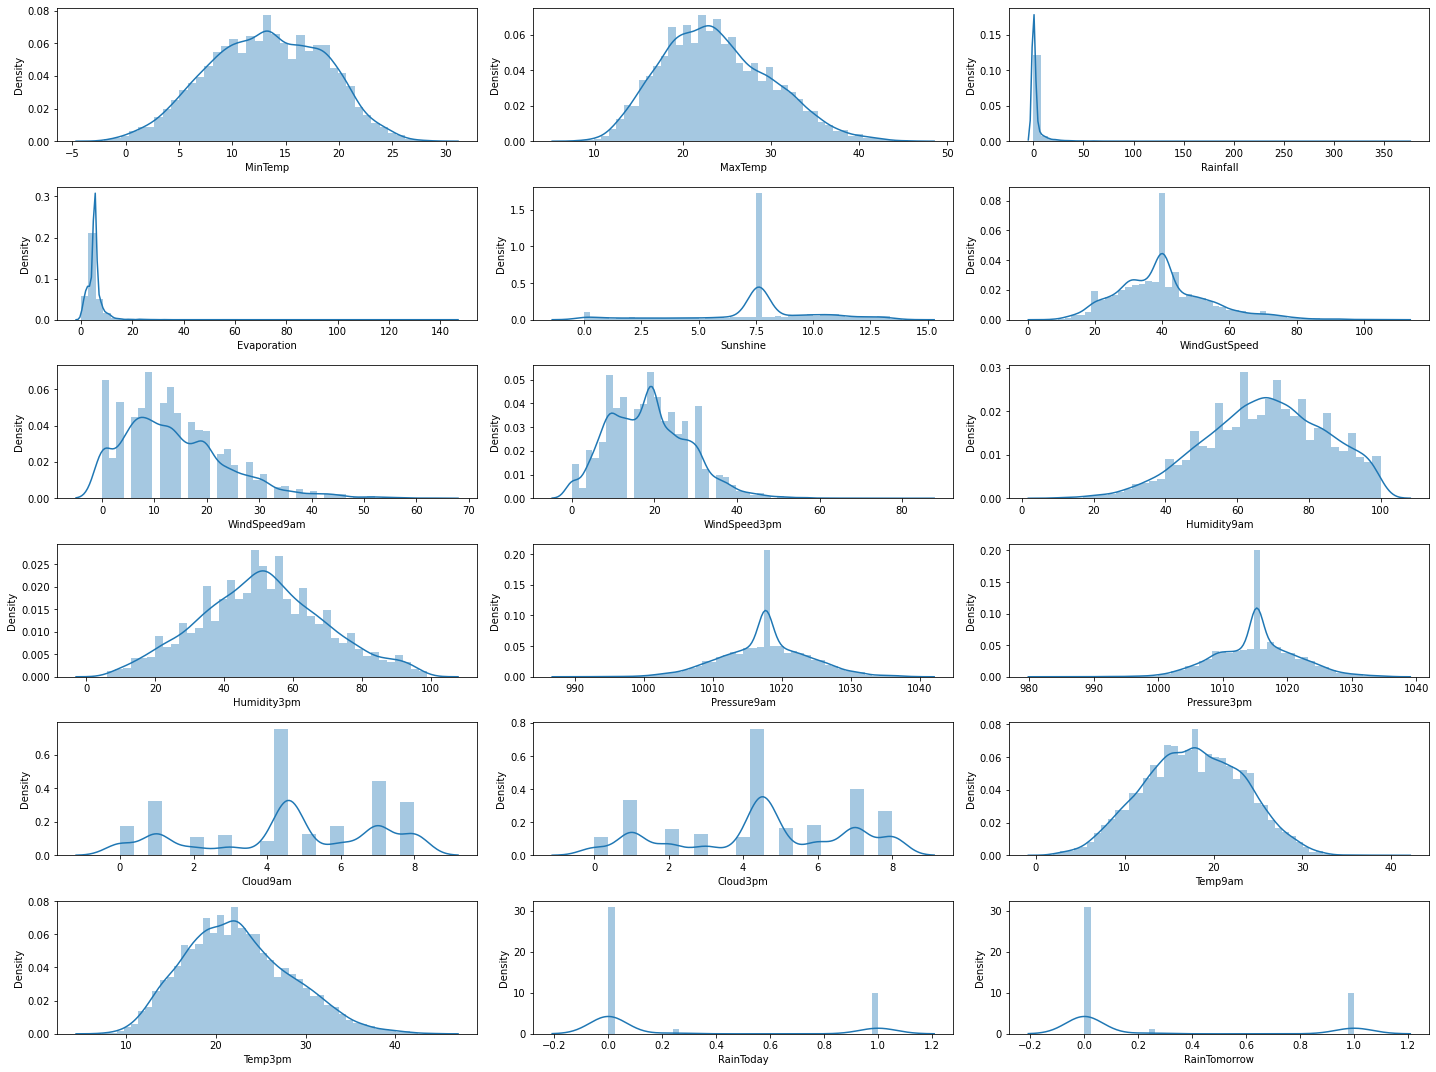

In [38]:
#visualize the data and analyze the relationship between independent & dependent variables
plt.figure(figsize=(20,15))
plotnumber=1
for column in df:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()

In [39]:
#divide data set into features and Label
y=df['RainTomorrow']
x=df.drop(columns=['RainTomorrow'])
y

0       0.00000
1       0.00000
2       0.00000
3       0.00000
4       0.00000
         ...   
8420    0.00000
8421    0.00000
8422    0.00000
8423    0.00000
8424    0.24322
Name: RainTomorrow, Length: 8425, dtype: float64

In [40]:
x

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.900000,0.6,5.389395,7.632205,44.000000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0.0
1,7.4,25.100000,0.0,5.389395,7.632205,44.000000,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0.0
2,12.9,25.700000,0.0,5.389395,7.632205,46.000000,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0.0
3,9.2,28.000000,0.0,5.389395,7.632205,24.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0.0
4,17.5,32.300000,1.0,5.389395,7.632205,41.000000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.400000,0.0,5.389395,7.632205,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0.0
8421,3.6,25.300000,0.0,5.389395,7.632205,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0.0
8422,5.4,26.900000,0.0,5.389395,7.632205,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0.0
8423,7.8,27.000000,0.0,5.389395,7.632205,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0.0


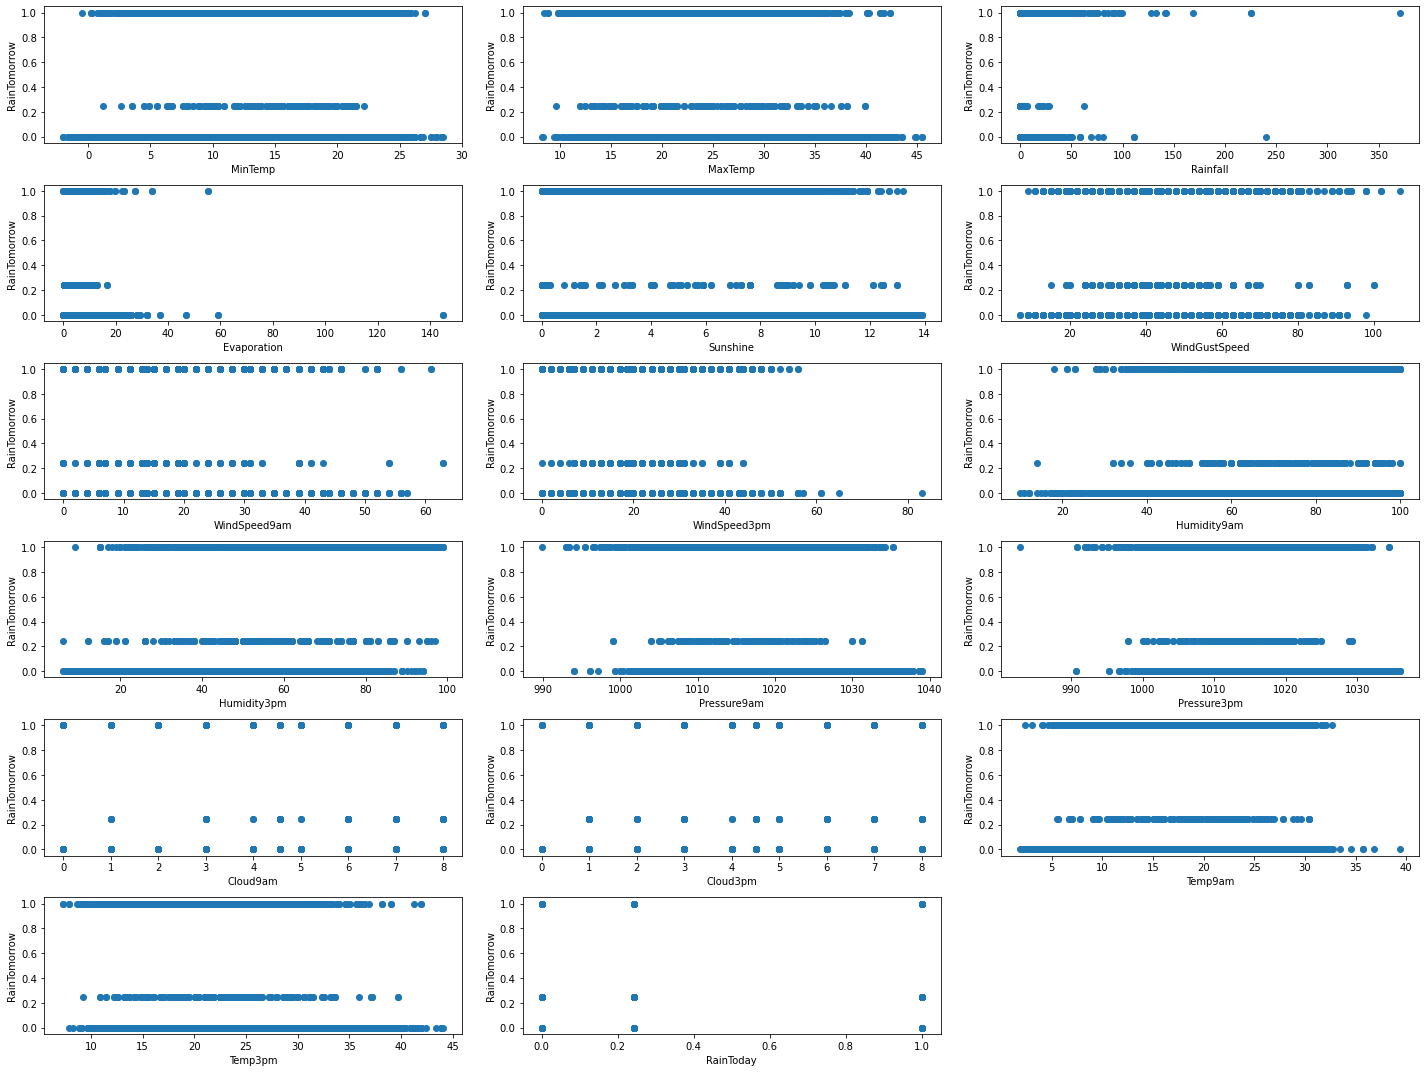

In [42]:
#visualizing relationship
plt.figure(figsize=(20,15))
plotnumber=1
for column in x:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column)
        plt.ylabel('RainTomorrow')
    plotnumber+=1
plt.tight_layout()

In [45]:
#DataScaling
Scaler=StandardScaler()
x_scaled=Scaler.fit_transform(x)
x_scaled

array([[ 3.84250100e-02, -1.57008852e-01, -2.13985662e-01, ...,
        -1.53712470e-01, -1.08138052e-01, -5.75018074e-01],
       [-1.07698898e+00,  2.02812062e-01, -2.72188947e-01, ...,
        -1.00217155e-01,  3.12348332e-01, -5.75018074e-01],
       [-5.45261556e-02,  3.00945038e-01, -2.72188947e-01, ...,
         5.77390162e-01,  1.27334323e-01, -5.75018074e-01],
       ...,
       [-1.44879364e+00,  4.97210991e-01, -2.72188947e-01, ...,
        -9.38310416e-01,  6.15098528e-01, -5.75018074e-01],
       [-1.00262804e+00,  5.13566487e-01, -2.72188947e-01, ...,
        -4.74684357e-01,  5.98279073e-01, -5.75018074e-01],
       [ 3.17278507e-01, -2.90531973e-15, -2.72188947e-01, ...,
        -4.92516128e-01, -2.59513150e-01, -5.75018074e-01]])

In [46]:
#split data into train & test. Model will be built on training data & tested on test data
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=348)
y_train.head()

6208    1.0
8372    1.0
5667    1.0
5660    0.0
7384    0.0
Name: RainTomorrow, dtype: float64

In [47]:
#building model
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [49]:
df.tail(3)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8422,5.4,26.900000,0.0,5.389395,7.632205,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0.0,0.00000
8423,7.8,27.000000,0.0,5.389395,7.632205,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0.0,0.00000
8424,14.9,23.859976,0.0,5.389395,7.632205,40.174469,17.0,17.0,62.0,36.0,1020.2,1017.9,8.000000,8.000000,15.0,20.9,0.0,0.24322


In [51]:
#since we have already fit the scaler, we can transform the data
print("Change of Rain Tomorrow will be:",regression.predict(Scaler.transform([[14.9,23.859976,0.0,5.389395,7.632205,40.174469,17.0,17.0,62.0,36.0,1020.2,1017.9,8.000000,8.000000,15.0,20.9,0.0]])))

Change of Rain Tomorrow will be: [0.12217999]


In [54]:
#saving the model to the local file system for later use for prediction
pickle.dump(regression,open('reg_model','wb'))

In [56]:
#prediction using the saved model
loaded_model=pickle.load(open('reg_model','rb'))
a=loaded_model.predict(Scaler.transform([[7.8,27.000000,0.0,5.389395,7.632205,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0.0]]))
a

array([-0.0722274])

In [57]:
#let's try in new window with only pickle model
Scaler.transform([[7.8,27.000000,0.0,5.389395,7.632205,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0.0]])

array([[-1.00262804e+00,  5.13566487e-01, -2.72188947e-01,
        -1.24975074e-07,  2.83572799e-08, -8.83790817e-01,
        -8.36935528e-02, -1.18852479e+00, -1.00293687e+00,
        -1.48818069e+00,  2.80423638e-01,  2.03298781e-01,
        -6.44949678e-01, -1.08867997e+00, -4.74684357e-01,
         5.98279073e-01, -5.75018074e-01]])

In [58]:
#let's check how well model fits on train data, adjusted r2 score
regression.score(x_train,y_train)

0.3205509526547152

In [59]:
#let's check how well model fits on test data
regression.score(x_test,y_test)

0.30880773690814756

In [60]:
#let's plot ana visualize
y_pred=regression.predict(x_test)
y_pred

array([ 0.54268499,  0.62320369, -0.02743574, ...,  0.01075731,
        0.30099136,  0.19387856])

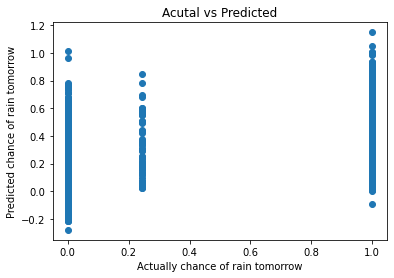

In [61]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actually chance of rain tomorrow')
plt.ylabel('Predicted chance of rain tomorrow')
plt.title('Acutal vs Predicted')
plt.show()

In [63]:
#model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred=regression.predict(x_test)

In [64]:
#mean absolute error
mean_absolute_error(y_test,y_pred)

0.27143404471422017

In [65]:
#mean squared error
mean_squared_error(y_test,y_pred)

0.12588843138364422

In [66]:
#root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

0.3548075976971804

In [67]:
#Now find the best learning rate with ridge cv and lasso cv
from sklearn.linear_model import Ridge,Lasso, RidgeCV, LassoCV

In [68]:
lasscv=LassoCV(alphas=None,max_iter=100,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [69]:
#best alpha parameter
alpha=lasscv.alpha_
alpha

1.185911483814985e-05

In [70]:
#now that we have best parameter, let's use Lasso Regression and see how well our data has fitted before
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=1.185911483814985e-05)

In [71]:
lasso_reg.score(x_test,y_test)

0.3088199972038773

In [73]:
#using ridge regression model
np.arange(0.001,0.1,0.01)

array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091])

In [75]:
#ridge cv will return best alpha and coefficients after performing 10 cross validation
ridgeCV=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgeCV.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [76]:
ridgeCV.alpha_

0.001

In [77]:
ridge_model=Ridge(alpha=ridgeCV.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [78]:
ridge_model.score(x_test,y_test)

0.30880773279080476

In [ ]:
#So we have checked with different type of regularization, it is showing same result
#30% chance for rain tomorrow